## Задание 1
Retention – один из самых важных показателей в компании. Ваша задача – написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока). Данные лежат в папке shared и имеют следующую структуру:

In [1]:
import pandas as pd
import numpy as np
import time
import warnings
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg
import scipy.stats as ss
import pylab
import scipy.stats as stats
from tqdm.auto import tqdm
from scipy.stats import norm
%matplotlib inline

Выгрузка библиотек 

In [2]:
df = pd.read_csv('/home/anatoly/shared/problem1-reg_data.csv', sep = ';')
df1 = pd.read_csv('/home/anatoly/shared/problem1-auth_data.csv', sep = ';')

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


Выгрузка данных

In [3]:
df

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3
3,959523541,4
4,969103313,5
...,...,...
999995,1600874034,1110618
999996,1600874086,1110619
999997,1600874139,1110620
999998,1600874191,1110621


Данные о времени регистрации

In [4]:
df1

,auth_ts,uid
0,911382223,1
1,932683089,2
2,932921206,2
3,933393015,2
4,933875379,2
...,...,...
9601008,1600874034,1110618
9601009,1600874086,1110619
9601010,1600874139,1110620
9601011,1600874191,1110621


Данные о времени захода пользователей в игру

## Проведем EDA для первой таблицы (Данные о времени регистрации)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   reg_ts  1000000 non-null  int64
 1   uid     1000000 non-null  int64
dtypes: int64(2)
memory usage: 15.3 MB


In [6]:
df.duplicated().sum()

0

По результату EDA набор данных состоит из 2 колонок:  uid, reg_ts.

В наборе данных 1000000 наблюдений

В наборе данных нет дубликатов и пропущенных значений

## Проведем EDA для второй таблицы (Данные о времени захода пользователей в игру)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601013 entries, 0 to 9601012
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   auth_ts  int64
 1   uid      int64
dtypes: int64(2)
memory usage: 146.5 MB


In [8]:
df1.duplicated().sum()

0

По результату EDA набор данных состоит из 2 колонок: uid, auth_ts.

В наборе данных 9601012 наблюдений

В наборе данных нет дубликатов и пропущенных значений

Retention
RR = (колличество клиентов на конец периода - колличество новых клиентов на период)/колличество клиентов в начале периода

In [9]:
df['reg_ts'] = df['reg_ts'].apply(datetime.fromtimestamp)

Перевод времени в дату, месяц, год, часы, минуты, секунду

In [10]:
df1['auth_ts'] = df1['auth_ts'].apply(datetime.fromtimestamp)

Перевод времени в дату, месяц, год, часы, минуты, секунду

In [11]:
vsa = df1.merge(df, on = 'uid')

Соединяем две таблицы в одну 

In [12]:
vsa.head()

,auth_ts,uid,reg_ts
0,1998-11-18 12:43:43,1,1998-11-18 12:43:43
1,1999-07-23 02:38:09,2,1999-07-23 02:38:09
2,1999-07-25 20:46:46,2,1999-07-23 02:38:09
3,1999-07-31 07:50:15,2,1999-07-23 02:38:09
4,1999-08-05 21:49:39,2,1999-07-23 02:38:09


Единая таблица (5 первых строк)

## Проведем EDA для общей таблицы

In [13]:
vsa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9601013 entries, 0 to 9601012
Data columns (total 3 columns):
 #   Column   Dtype         
---  ------   -----         
 0   auth_ts  datetime64[ns]
 1   uid      int64         
 2   reg_ts   datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 293.0 MB


In [14]:
vsa.duplicated().sum()

0

По результату EDA набор данных состоит из 3 колонок:
auth_ts,
uid, 
reg_ts.

В наборе данных 9601013 наблюдений

В наборе данных нет дубликатов и пропущенных значений

In [15]:
vsa[['reg_ts', 'auth_ts']].max()

reg_ts    2020-09-23 18:17:24
auth_ts   2020-09-23 18:17:24
dtype: datetime64[ns]

In [16]:
vsa[['reg_ts', 'auth_ts']].min()

reg_ts    1998-11-18 12:43:43
auth_ts   1998-11-18 12:43:43
dtype: datetime64[ns]

In [17]:
vsa.rename(columns = {'uid':'user_id', 'auth_ts':'end_date', 'reg_ts' : 'start_date'}, inplace = True )

Переименовываем колонки для удобства

In [18]:
vsa['start_date'] = [pd.Timestamp(x,unit='s').date() for x in vsa['start_date']]
vsa['end_date'] = [pd.Timestamp(x,unit='s').date() for x in vsa['end_date']]

Переводим данные о времени события в Timestamp

In [19]:
vsa['end_date'] = pd.to_datetime(vsa['end_date'])
vsa['start_date'] = pd.to_datetime(vsa['start_date'])

Переводим данные о времени события в datetime64[ns]

In [20]:
def retention_rate(df, start, end):

    """
    Фунцкия считает retention, а также принимает на вход датасет и ещё два параметра: начало и конец периода
    """
    df['days'] = (df['end_date'] - df['start_date']).dt.days + 1
    cohort_counts = vsa.groupby(['start_date', 'days'], as_index = False) \
    .agg({'user_id':'nunique'}) \
    .pivot(index='start_date', columns='days', values='user_id')[start:end]

    base = cohort_counts[1]
    retention = cohort_counts.divide(base, axis=0).round(3)
    
    plt.figure(figsize=(18,14))
    plt.title('Retention',
                  color = 'black',
                  fontsize = 16,
                  x = 0.5)
    plt.xlabel(' ')
    plt.ylabel(' ')
    plt.xticks(color = 'black',
                   fontsize = 16,
                   rotation = 90)
    plt.yticks(rotation = 0,
                   color = 'black',
                   fontsize = 16)
    ax = sns.heatmap(data=retention.iloc[:,0:31], annot=True, fmt='.0%', vmin=0.0, vmax=0.15, cmap='PiYG')
    ax.set_yticklabels(retention.index)
    fig=ax.get_figure()
    fig.savefig("Retention.png")
    
    return cohort_counts.iloc[:,0:31] 

Считаем ретеншен по дневным когортам и дневным интервалам.

days,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
start_date,,,,,,,,,,,,,,,,,,,,,
2020-09-01,1585.0,33.0,71.0,60.0,81.0,94.0,94.0,97.0,76.0,78.0,...,67.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-02,1588.0,33.0,68.0,66.0,98.0,97.0,108.0,97.0,82.0,60.0,...,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-03,1591.0,38.0,81.0,81.0,99.0,108.0,135.0,98.0,82.0,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-04,1593.0,30.0,62.0,79.0,77.0,108.0,114.0,79.0,79.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-05,1596.0,34.0,66.0,70.0,79.0,105.0,114.0,84.0,83.0,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-06,1598.0,56.0,69.0,82.0,93.0,93.0,111.0,103.0,90.0,89.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-07,1601.0,44.0,66.0,88.0,80.0,107.0,102.0,92.0,67.0,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-08,1604.0,31.0,57.0,55.0,94.0,113.0,116.0,107.0,80.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-09,1606.0,34.0,54.0,72.0,101.0,109.0,95.0,97.0,73.0,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


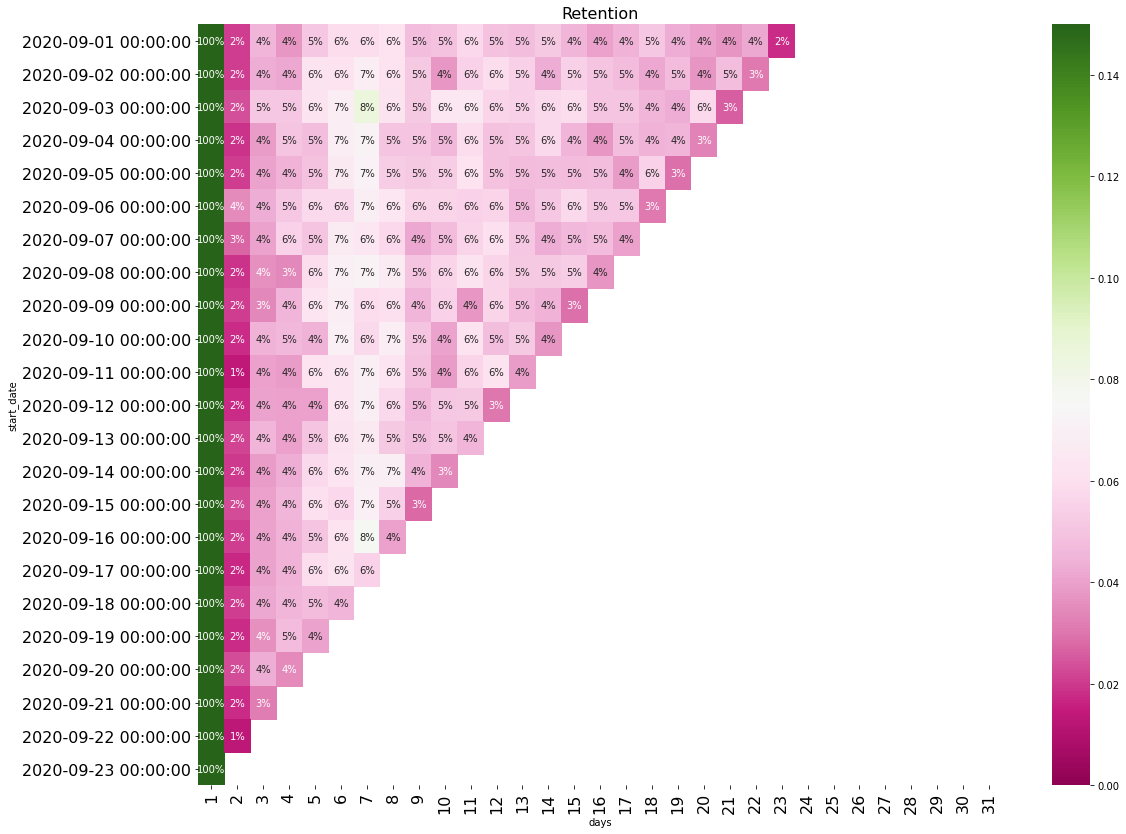

In [21]:
retention_rate(vsa, '2020-09-01','2020-09-23').fillna(0)

Функция, которая считает retention игроков (по дням от даты регистрации игрока)

## ОПИСАНИЕ к 1 Заданию

Выше представлена диаграмма за последний, не полный месяц. Чтобы посмотреть данные интересующих нас дат, в строке "retention_rate(vsa, '2020-09-01', '2020-09-23').fillna(0)", нужно поменять даты на интересующие.

## Задание 2

Имеются результаты A/B теста, в котором двум группам пользователей предлагались различные наборы акционных предложений. Известно, что ARPU в тестовой группе выше на 5%, чем в контрольной. При этом в контрольной группе 1928 игроков из 202103 оказались платящими, а в тестовой – 1805 из 202667.

Какой набор предложений можно считать лучшим? Какие метрики стоит проанализировать для принятия правильного решения и как?

In [22]:
df2 = pd.read_csv('1__2.csv', sep =';')

Выгружаем данные 

In [23]:
df2

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b
...,...,...,...
404765,404766,0,a
404766,404767,0,b
404767,404768,231,a
404768,404769,0,a


## Проведем EDA

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404770 entries, 0 to 404769
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    404770 non-null  int64 
 1   revenue    404770 non-null  int64 
 2   testgroup  404770 non-null  object
dtypes: int64(2), object(1)
memory usage: 9.3+ MB


In [25]:
df2.duplicated().sum()

0

По результату EDA набор данных состоит из 4 колонок: user_id, revenue, testgroup, purchases.

В наборе данных 404770 наблюдений

В наборе данных нет дубликатов и пропущенных значений

In [26]:
tt = df2.query("testgroup == 'a'")

Выносим 'a' в отдельную таблицу

In [27]:
tt

,user_id,revenue,testgroup
1,2,0,a
2,3,0,a
9,10,0,a
10,11,0,a
11,12,0,a
...,...,...,...
404760,404761,0,a
404762,404763,0,a
404765,404766,0,a
404767,404768,231,a


In [28]:
tt.revenue.sum()

5136189

Считаем сумму доходов 'a'

In [29]:
tt2 = df2.query("testgroup == 'b'")

Выносим 'b' в отдельную таблицу

In [30]:
tt2

,user_id,revenue,testgroup
0,1,0,b
3,4,0,b
4,5,0,b
5,6,0,b
6,7,0,b
...,...,...,...
404761,404762,0,b
404763,404764,0,b
404764,404765,0,b
404766,404767,0,b


In [31]:
tt2.revenue.sum()

5421603

Считаем сумму доходов 'b'

In [32]:
tt2.revenue.sum() - tt.revenue.sum() 

285414

По результатам суммирование таблица 'b' имеет выше доходность чем таблица 'a' на 285414

## Теперь посмотрим на средний чек

In [33]:
round(tt.query('revenue > 0')['revenue'].sum() / 
      tt.query('revenue > 0')['revenue'].count(),2)

2664.0

In [34]:
round(tt2.query('revenue > 0')['revenue'].sum() /
      tt2.query('revenue > 0')['revenue'].count(),2)

3003.66

Среднее значение больше у 'b'

## MAX значение

In [35]:
tt.revenue.max()

37433

In [36]:
tt2.revenue.max()

4000

Получаем достаточно интересный результат. 'a' выигрывает 'b' по максимальной сумме. Из чего напрашивается вывод: в таблице 'a' меньше продаж, но они дороже

## Посмотрим на медиану 

In [37]:
tt.query('revenue > 0')['revenue'].median()

311.0

In [38]:
tt2.query('revenue > 0')['revenue'].median()

3022.0

медиана b в разы больше a

## Теперь посторим график 'квантия-квантиля' или же по-другому график нормальности

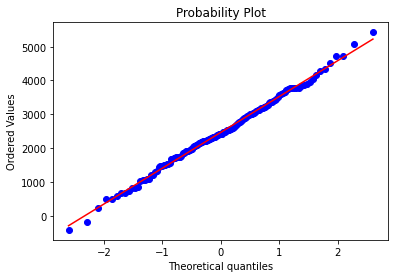

In [39]:
measurements = np.random.normal(loc = 2500, scale = 1000, size = 150)
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

Не все кружки находятся на одной линии, что и доказывает ненормальность графика

## Рассмотрим через pingouin
Нулевая гипотеза - распределение нормальное

Альтернативная гипотеза - распределение ненормальное

In [40]:
pg.normality(data=tt, dv = 'revenue', group = 'testgroup', method = 'normaltest')

,W,pval,normal
a,585152.731273,0.0,False


In [41]:
pg.normality(data=tt2, dv = 'revenue', group = 'testgroup', method = 'normaltest')

,W,pval,normal
b,326622.395409,0.0,False


Тест является ненормальым 

## Гистограмма

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


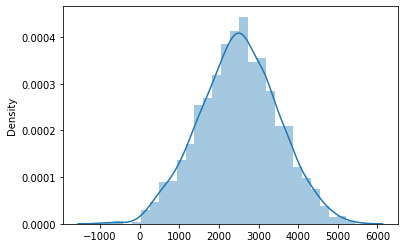

In [42]:
measurements = np.random.normal(loc = 2500, scale = 1000, size = 1500)
ax = sns.distplot(measurements)

гистограмма также показывает ненормальность графика

## Посмотрим на результаты конверсии

Создадим новую колонку и узнаем делал ли пользователь покупки или нет

In [43]:
purchases = []
for i in df2['revenue']:
    if i == 0:
        x = 'no'
    else:
        x = 'yes'
    purchases.append(x) 
df2['purchases'] = purchases

In [44]:
df21 = df2.drop('purchases', axis=1)

Удаляем ненужную колонку 

In [45]:
df21

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b
...,...,...,...
404765,404766,0,a
404766,404767,0,b
404767,404768,231,a
404768,404769,0,a


## Создадим график конверсии и разделим на группы 'a' и 'b'

In [46]:
pp = df2.groupby(['purchases', 'testgroup'], as_index = False).agg({'user_id' : 'count'}) \
    .rename(columns = {'user_id' : 'count'}) \
    .sort_values('testgroup') \
    .reset_index(drop = True)

In [47]:
pp['combination'] = pp['purchases'] + '_' + pp['testgroup']

In [48]:
pp['percentage'] = round(pp['count'][:2] / pp['count'][:2].sum() * 100, 2)

In [49]:
pp['percentage'][2:] = round(pp['count'][2:] / pp['count'][2:].sum() * 100, 2)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Text(0.2, 1.2, 'Конверсия по группам')

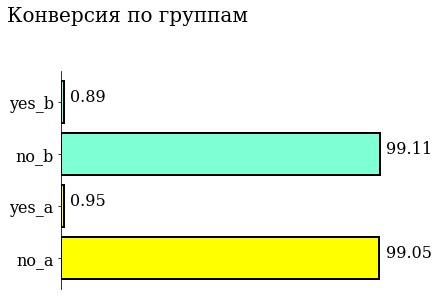

In [50]:
plt.barh(y = pp['combination'], width = pp['percentage'], color = ['#FFFF00', '#FFFF00', '#7FFFD4', '#7FFFD4'], height = 0.8,
         edgecolor = 'black',
         linewidth = 2)

sns.despine(bottom = True)

plt.xticks([])
plt.yticks(color = 'black', fontsize = 16,  family = 'serif')

for i in range(len(pp)):
    plt.text(s = pp['percentage'][i], x = pp['percentage'][i] + 2, y = i, color = 'black', fontsize = 16, family = 'serif')
    
plt.title(label = 'Конверсия по группам',
          color = 'black',
          fontsize = 20,
          x = 0.2,
          y = 1.2,
          family = 'serif')

Из данного графика можно сделать вывод, что 'a' обгоняет 'b' на 0.06%  

Нулевая гипотеза - есть стат. значимое влияние между группами 'a' и 'b'

Альтернативная гипотеза - нет стат. значимого влияния между группами 'a' и 'b'

Проверим с помощью хи-квадрата стат. значимость

In [51]:
alpha = 0.05
stat, p = stats.chi2_contingency(pd.crosstab(df2['testgroup'], df2['purchases']))[:2]
if p < alpha:
    print('Нулевая гипотеза отклоняется, есть стат. значимое влияние')
else:
    print('Нулевая гипотеза не отклоняется, нет стат. значимого влияния')

Нулевая гипотеза отклоняется, есть стат. значимое влияние


## ARPU

In [52]:
tt['revenue'].sum()/tt['user_id'].nunique()

25.413719736965806

In [53]:
tt2['revenue'].sum()/tt2['user_id'].nunique()

26.75128659327863

## Чтобы определить имеется ли стат. значимая разница ARPU\ARPPU между группами будем использовать t-test и bootstrap (mean).

Применение данных методов обусловлено следующим:

1) вышеуказанные методы проверяют наличие стат. значимой разницы метрики из задания

2) кол-во наблюдений больше 30

3) результаты t-test и bootstrap (mean) легче интерпретировать

4) непараметрические методы не учитывают специфику распределений (в группе а имеют значительные группа пользователей, которые принесли в разы больше выручки, чем среднестатистический пользователь - не случайность)

## Проведем t-тест для ARPU
Нулевая гипотеза - есть стат. значимое влияние между группами 'a' и 'b'

Альтернативная гипотеза - нет стат. значимого влияния между группами 'a' и 'b'

In [54]:
alpha = 0.05
p = stats.ttest_ind(df21.query("testgroup == 'a'")['revenue'], df21.query("testgroup == 'b'")['revenue'], 
                    equal_var = False)[1]
print(p)
if p < alpha:
    print('Нулевая гипотеза о равенстве средних отклонена')
else:
    print('Нуелвая гипотеза о равенстве средних не отклонена')

0.5329647014130866
Нуелвая гипотеза о равенстве средних не отклонена


t-тест показал, что стат.значимых различий между ARPU группами 'a' и 'b' нет

## Построим bootstrap для ARPU
Нулевая гипотеза - есть стат. значимое влияние между группами 'a' и 'b'

Альтернативная гипотеза - нет стат. значимого влияния между группами 'a' и 'b'

In [55]:
tt.sample(frac = 1, replace = True)

,user_id,revenue,testgroup
381229,381230,0,a
179739,179740,0,a
81654,81655,0,a
188448,188449,0,a
247357,247358,0,a
...,...,...,...
317456,317457,0,a
280657,280658,0,a
25589,25590,0,a
22928,22929,0,a


выборка с повторениями

создадим гистограмму

In [56]:
def get_bootstrap(data_column_1, data_column_2, boot_it = 1000, statistic = np.mean, bootstrap_conf_level = 0.95):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): 
        samples_1 = data_column_1.sample(boot_len, replace = True).values
        
        samples_2 = data_column_2.sample(boot_len, replace = True).values
        
        boot_data.append(statistic(samples_1-samples_2)) 
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    qq1 = norm.cdf(x = 0, loc = np.mean(boot_data), scale = np.std(boot_data))
    
    qq2 = norm.cdf(x = 0, loc = -np.mean(boot_data), scale = np.std(boot_data))
    p_value = min(qq1, qq2)* 2
        
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('#FFFF00')
        else: 
            bar.set_facecolor('#7FFFD4')
            bar.set_edgecolor('black')
       
    return {"boot_data": boot_data, "quants": quants, "p_value": p_value}

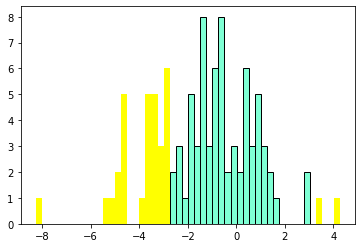

In [57]:
ARPU_bootstrap = get_bootstrap(tt.revenue, tt2.revenue, boot_it = 100, statistic = np.mean)

In [58]:
ARPU_bootstrap['p_value']

0.5024077350207505

Ноль входит в доверительный интервал и значение p_value > 0.05 значит нет поводов отклонять H0 Статзначимых различий не обнаружено

## ARPPU

In [59]:
tt.query("revenue > 0")['revenue'].sum()/tt.query("revenue > 0")['user_id'].nunique()

2663.9984439834025

In [60]:
tt2.query("revenue > 0")['revenue'].sum()/tt2.query("revenue > 0")['user_id'].nunique()

3003.6581717451522

## Проведем t-тест для ARPPU
Нулевая гипотеза - есть стат. значимое влияние между группами 'a' и 'b'

Альтернативная гипотеза - нет стат. значимого влияния между группами 'a' и 'b'

In [61]:
p = stats.ttest_ind(df21.query("testgroup == 'a' & revenue > 0")['revenue'], df21.query("testgroup == 'b' & revenue > 0")['revenue'], 
                    equal_var = False)[1]
print(p)
if p < alpha:
    print('Нулевая гипотеза о равенстве средних отклонена')
else:
    print('Нуелвая гипотеза о равенстве средних не отклонена')

0.10020780398916015
Нуелвая гипотеза о равенстве средних не отклонена


t-тест показал, что стат.значимых различий между ARRPU группами 'a' и 'b' нет

## Построим bootstrap для ARPPU
Нулевая гипотеза - есть стат. значимое влияние между группами 'a' и 'b'

Альтернативная гипотеза - нет стат. значимого влияния между группами 'a' и 'b'

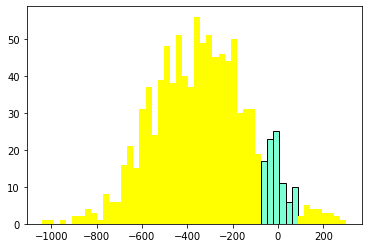

In [62]:
ARPPU_bootstrap = get_bootstrap(tt.query('revenue > 0').revenue, tt2.query('revenue > 0').revenue,
                              boot_it = 1000, statistic = np.mean)

In [63]:
ARPPU_bootstrap['p_value']

0.11567465198315548

Ноль входит в доверительный интервал и значение p_value > 0.05 значит нет поводов отклонять H0 Статзначимых различий не обнаружено

## Посчитаем выручку по группам

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


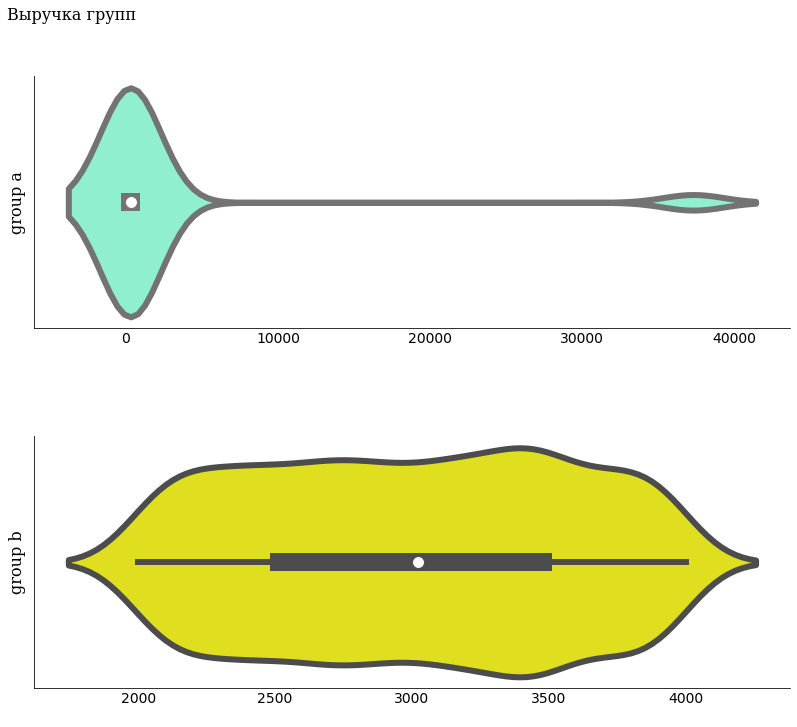

In [64]:
fig = plt.figure(figsize = (15, 5))

ax0 = fig.add_axes([0, 0, 0.7, 0.7])
ax1 = fig.add_axes([0, -1, 0.7, 0.7])

sns.violinplot(df2.query("testgroup == 'a' & revenue > 0")['revenue'], ax = ax0, color = '#7FFFD4', edgecolor = 'black', linewidth = 6)
sns.violinplot(df2.query("testgroup == 'b' & revenue > 0")['revenue'], ax = ax1, color = '#FFFF00', edgecolor = 'black', linewidth = 6)

ax0.set_xlabel(' ')
ax1.set_xlabel(' ')

ax0.set_ylabel('group a', fontsize = 16, family = 'serif')
ax1.set_ylabel('group b', fontsize = 16, family = 'serif')

ax0.tick_params(length = 0, width = 0, colors = 'black', labelsize = 14)
ax1.tick_params(length = 0, width = 0, colors = 'black', grid_color = 'black', labelsize = 14)


sns.despine()

ax0.set_title(label = 'Выручка групп', color = 'black', fontsize = 16, x = 0.05, y = 1.2, family = 'serif')

plt.show()

## Рассмотрим графики подробнее

В графике 'a' размах выручки больше чем на графике 'b' (пользователи совершают либо очень дешевые покупки, либо очень дорогие), но в графике 'b' выручка более равномерная и стабильная.

## ИТОГ:

1) По результатам суммирование таблица 'b' имеет выше доходность чем таблица 'a' на 285414

2) Среднее значение больше у 'b'

3) Получаем достаточно интересный результат. 'a' выигрывает 'b' по максимальной сумме. Из чего напрашивается вывод: в таблице 'a' меньше продаж, но они дороже

4) медиана b в разы больше a

5) По результатам конверсии стало извсетно, что 'a' обгоняет 'b' на 0.06%  

6) В ARPU и ARPPU результат одинаковый, где 'b' > 'a'

7) Выручка по группам. В графике 'a' размах выручки больше чем на графике 'b' (пользователи совершают либо очень дешевые покупки, либо очень дорогие), но в графике 'b' выручка более равномерная и стабильная.

8) график 'квантия-квантиля' или же по-другому график нормальности также доказал, что не все кружки находятся на одной линии, что в свою очередь и доказывает ненормальность графика

9) По pingouin тест также является ненормальным

10) bootstrap показал, что p_value > 0.05 значит нет поводов отклонять.

## ВЫВОД

Исходя из всего вышеперечисленного, вариант 'b' намного более удачный для реализации и его по праву можно считать лучшим. Но при этом корректность проведенного эксперимента весьма сомнительна - т.к. в группах разные, непересекающиеся сегменты пользователей по величине оплат и наиболее вероятно, что дизайн эксперимента нарушен и сплитование проведено некорректно. 

## Задание 3
В игре Plants & Gardens каждый месяц проводятся тематические события, ограниченные по времени. В них игроки могут получить уникальные предметы для сада и персонажей, дополнительные монеты или бонусы. Для получения награды требуется пройти ряд уровней за определенное время. С помощью каких метрик можно оценить результаты последнего прошедшего события?

Предположим, в другом событии мы усложнили механику событий так, что при каждой неудачной попытке выполнения уровня игрок будет откатываться на несколько уровней назад. Изменится ли набор метрик оценки результата? Если да, то как?

## Метрики с помощью которых можно оценить результаты последнего прошедшего события:        

1) Конкретное число участников последнего события в игре - благодоря данной метрики можно узнать популярность данного эвента (метрика роста)

2) Игроки получишвшие приз в данном эвенте - метрика показывает актуальность обновы и колличество пользовотель заинтересованных в награде (метрика продукта)

3) Также подойдет метрика DAU, с помощью которой можно сравнить количествово пользователей в тематические дни и в обычные. (метрика роста)

4) Время препрвождения в игре в обычные дни и в тематическом событии - метрика ASL (метрика продукта)

5) В какое время суток больше всего онлайна - метрика ACU (метрика роста)

5) Новая аудитория, метрика конверсии - позволят определить как проведение тематических событий сказывавается на её привлечении. (метрика продукта)

6) Отзывы игроков и обратная свзязь - узнать о багах игры (метрика продукта)

7) Чаще всего прохождаемые уровни в игре - данная метрика позволит узнать, что интересно игрокам (метрика роста)

8) Самые не прохождаемые уровни в игре - данная метрика позволит узнать, что игракам не нравится (метрика роста)

## Метрики с помощью которых можно оценить результаты последнего прошедшего события (после обновы):

При таком серьезном патче, где игроки будут при каждой неудачной попытке выполнения уровня откатываться на несколько уровней назад игра потеряет число пользователей из чего можно сделать вывод, что данная обнова неудачная 

Добавятся новые метрики такие как:

1) Число пользователей покинувших игру после обновления (метрика роста)

2) Уменьшится число скачиваний в PlayMarket и App Store псоле обновы (метрика роста)

3) Уменьшится время сессии в игре - ASL (метрика продутка)

4) Яркие негативные коментарии пользователей)) (метрика продутка)

## ВЫВОД

Если игра существет определеное время на рынке и она имеет определенную популярность у людей, то нужно прислушываться к аудитории (быть с ней на одной волне). НЕЛЬЗЯ добавлять 'дизбаланс' игре, особено если игра является 'Инди'. В таких играх делать уровни негативные для пользователя просто недопустимо, человек просто перстанет в нее играть и уйдет к вашему оппоненту.